Gulio Valenzuela 20190336

#Librerias

In [10]:

import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sb


#Carga del archivo

In [11]:
IrisData = pd.read_csv('https://raw.githubusercontent.com/rhiever/Data-Analysis-and-Machine-Learning-Projects/master/example-data-science-notebook/iris-data.csv', na_values=['NA'])
IrisData.head()


,sepal_length_cm,sepal_width_cm,petal_length_cm,petal_width_cm,class
0,5.1,3.5,1.4,0.2,Iris-setosa
1,4.9,3.0,1.4,0.2,Iris-setosa
2,4.7,3.2,1.3,0.2,Iris-setosa
3,4.6,3.1,1.5,0.2,Iris-setosa
4,5.0,3.6,1.4,0.2,Iris-setosa


#Limpieza

In [12]:
IrisData.loc[IrisData['class'] == 'versicolor', 'class'] = 'Iris-versicolor'
IrisData.loc[IrisData['class'] == 'Iris-setossa', 'class'] = 'Iris-setosa'
IrisData['class'].unique()

array(['Iris-setosa', 'Iris-versicolor', 'Iris-virginica'], dtype=object)

In [13]:
IrisData.loc[(IrisData['class'] == 'Iris-versicolor') &
              (IrisData['sepal_length_cm'] < 1.0),
              'sepal_length_cm'] *= 100.0

In [14]:
mean_petal_width = IrisData.loc[IrisData['class'] == 'Iris-setosa', 'petal_width_cm'].mean()

IrisData.loc[(IrisData['class'] == 'Iris-setosa') &
              (IrisData['petal_width_cm'].isnull()),
              'petal_width_cm'] = mean_petal_width

IrisData.loc[(IrisData['class'] == 'Iris-setosa') &
              (IrisData['petal_width_cm'] == mean_petal_width)]

,sepal_length_cm,sepal_width_cm,petal_length_cm,petal_width_cm,class
7,5.0,3.4,1.5,0.251111,Iris-setosa
8,4.4,2.9,1.4,0.251111,Iris-setosa
9,4.9,3.1,1.5,0.251111,Iris-setosa
10,5.4,3.7,1.5,0.251111,Iris-setosa
11,4.8,3.4,1.6,0.251111,Iris-setosa


#Algoritmos

In [15]:
X = IrisData.iloc[:, 0:4].values
y = IrisData.iloc[:, 4].values
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.25, random_state = 0)

In [16]:
from sklearn.preprocessing import StandardScaler
sc = StandardScaler()
X_train = sc.fit_transform(X_train)
X_test = sc.transform(X_test)

In [17]:
from sklearn.tree import DecisionTreeClassifier
classifier = DecisionTreeClassifier(criterion = 'entropy', random_state = 0)
classifier.fit(X_train, y_train)

DecisionTreeClassifier(ccp_alpha=0.0, class_weight=None, criterion='entropy',
                       max_depth=None, max_features=None, max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, presort='deprecated',
                       random_state=0, splitter='best')

In [18]:
y_pred = classifier.predict(X_test)

In [19]:
from sklearn.metrics import confusion_matrix
cm = confusion_matrix(y_test, y_pred)


matriz de confucion

In [20]:
print(cm)

[[13  0  0]
 [ 0 15  1]
 [ 0  0  9]]


#Graficas

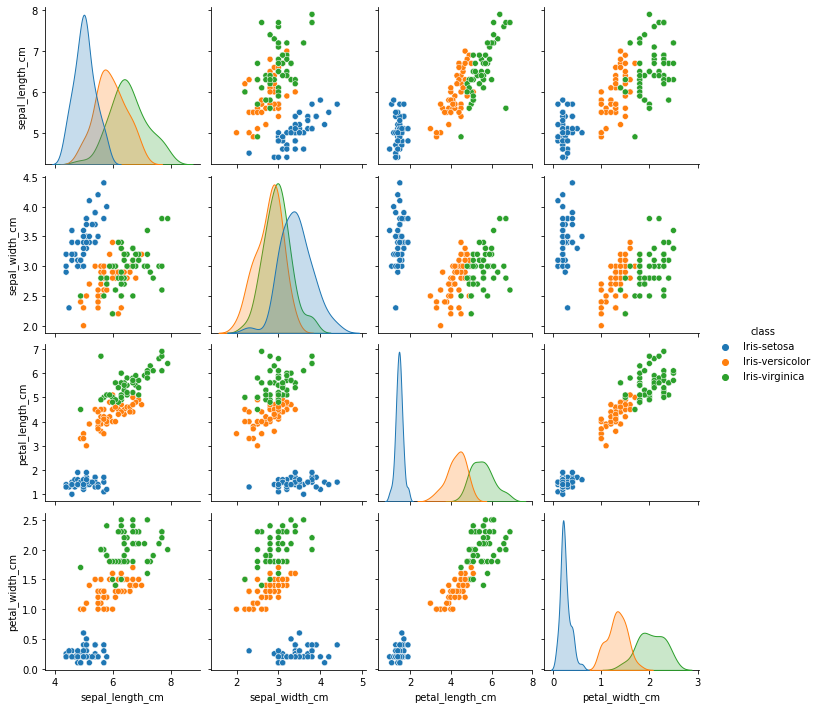

In [21]:
sb.pairplot(IrisData, hue='class');


In [55]:
from sklearn.datasets import load_iris
from sklearn.tree import DecisionTreeClassifier, plot_tree


n_classes = 3
plot_colors = "rgb"
plot_step = 0.02



(0.0, 7.88, -0.9, 3.4800000000000044)

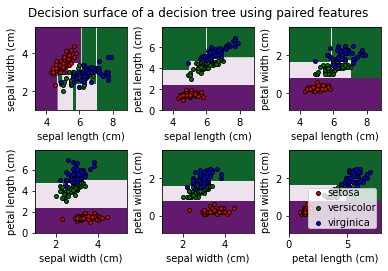

In [58]:
iris = load_iris()

for pairidx, pair in enumerate([[0, 1], [0, 2], [0, 3],
                                [1, 2], [1, 3], [2, 3]]):
    
    X = iris.data[:, pair]
    y = iris.target

    clf = DecisionTreeClassifier().fit(X, y)

 
    plt.subplot(2, 3, pairidx + 1)

    x_min, x_max = X[:, 0].min() - 1, X[:, 0].max() + 1
    y_min, y_max = X[:, 1].min() - 1, X[:, 1].max() + 1
    xx, yy = np.meshgrid(np.arange(x_min, x_max, plot_step),
                         np.arange(y_min, y_max, plot_step))
    plt.tight_layout(h_pad=0.5, w_pad=0.5, pad=2.5)

    Z = clf.predict(np.c_[xx.ravel(), yy.ravel()])
    Z = Z.reshape(xx.shape)
    cs = plt.contourf(xx, yy, Z, cmap=plt.cm.PRGn)

    plt.xlabel(iris.feature_names[pair[0]])
    plt.ylabel(iris.feature_names[pair[1]])

    
    for i, color in zip(range(n_classes), plot_colors):
        idx = np.where(y == i)
        plt.scatter(X[idx, 0], X[idx, 1], c=color, label=iris.target_names[i],
                    cmap=plt.cm.PRGn, edgecolor='black', s=15)
plt.suptitle("Decision surface of a decision tree using paired features")
plt.legend(loc='lower right', borderpad=0, handletextpad=0)
plt.axis("tight")
